In [1]:
import pandas as pd # for working on dataset
import numpy as np # for using numpy library
import matplotlib.pyplot as plt # for visualizing data in a graphical form
import quandl # for importing stock dataset

Importing the stock dataset of Wipro from 2010 using the quandl library.

In [2]:
data = quandl.get("NSE/WIPRO", start_date="2010-01-01")


In [3]:
data.shape

(2237, 7)

In [4]:
data.head(10) # displaying the first 10 rows of the dataset

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-01-04,685.00,697.0,675.95,696.35,693.80,767166.0,5301.77
2010-01-05,696.30,708.0,693.55,707.85,704.75,1120433.0,7835.49
2010-01-06,706.00,710.0,687.00,693.00,690.50,1029382.0,7138.37
2010-01-07,695.00,695.5,675.00,678.00,678.25,1031096.0,7005.77
2010-01-08,679.00,680.0,666.00,666.40,668.05,642789.0,4304.71
2010-01-11,667.00,681.1,656.25,664.00,661.40,1277525.0,8510.66
2010-01-12,672.00,703.8,672.00,693.00,693.80,2338854.0,16181.34
2010-01-13,696.95,720.0,688.45,718.10,715.60,2538808.0,17997.41
2010-01-14,719.80,752.7,708.20,736.00,741.10,4383044.0,32209.21


Plotting the graph to show the 'Close' trend over the years.

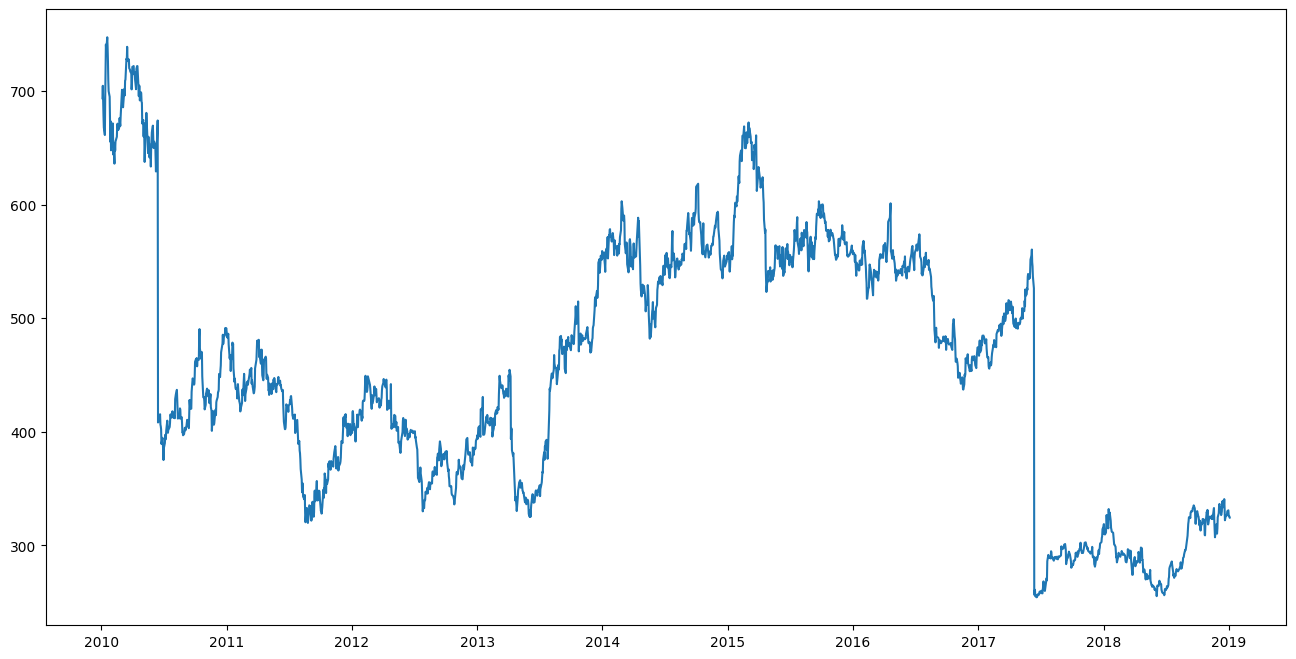

In [5]:
plt.figure(figsize=(16,8)) # specifying the size of the plot
plt.plot(data['Close'], label='Closing Price')

**Classification Problem of 'buying' or 'selling' a stock**

In [6]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

Predicting whether the customer should buy or sell a stock.

In [7]:
x = data[['Open - Close', 'High - Low']]
x.head()

,Open - Close,High - Low
Date,,
2010-01-04,-8.80,21.05
2010-01-05,-8.45,14.45
2010-01-06,15.50,23.00
2010-01-07,16.75,20.50
2010-01-08,10.95,14.00


Our Intension is to display '1' for the buy signal and '-1' for the sell signal.

In [8]:
y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)
y

array([ 1, -1, -1, ..., -1, -1, -1])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv = 5)

model.fit(x_train, y_train)

accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print('Train data accuracy : %.2f' %accuracy_train)
print('Test data accuracy : %.2f' %accuracy_test)

Train data accuracy : 0.75
Test data accuracy : 0.50


In [11]:
prediction_classification = model.predict(x_test)

In [12]:
actual_predicted_data = pd.DataFrame({'Actual Value' : y_test, 'Predicted Value' : prediction_classification})
actual_predicted_data.head(10)

,Actual Value,Predicted Value
0,1,-1
1,1,-1
2,1,1
3,1,-1
4,1,1
5,1,1
6,-1,1
7,-1,1
8,-1,-1
9,1,-1


**Regression Problem**

In [13]:
y = data['Close']
y

Date
2010-01-04    693.80
2010-01-05    704.75
2010-01-06    690.50
2010-01-07    678.25
2010-01-08    668.05
               ...  
2018-12-31    330.85
2019-01-01    326.65
2019-01-02    325.55
2019-01-03    325.50
2019-01-04    324.45
Name: Close, Length: 2237, dtype: float64

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.25)

params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv = 5)

model_reg.fit(x_train_reg, y_train_reg)
predictions = model_reg.predict(x_test_reg)

In [15]:
predictions

array([475.46923077, 514.95      , 375.14615385, 395.17692308,
       299.65      , 462.36538462, 464.31153846, 415.44230769,
       478.23461538, 332.39615385, 480.78076923, 488.20769231,
       544.76923077, 533.44230769, 538.09615385, 399.95      ,
       489.88461538, 436.93846154, 497.28846154, 300.17307692,
       456.96538462, 495.59615385, 325.88846154, 418.19615385,
       509.29230769, 511.05      , 457.50384615, 469.76923077,
       456.14230769, 416.63076923, 450.60769231, 357.65769231,
       427.98076923, 401.86538462, 436.4       , 461.58461538,
       433.3       , 424.02307692, 440.08461538, 456.18846154,
       506.89615385, 483.66153846, 508.77692308, 330.7       ,
       516.18461538, 424.11153846, 442.29230769, 388.69230769,
       299.3       , 475.46153846, 521.34615385, 454.61923077,
       306.15      , 421.72307692, 394.3       , 431.56923077,
       617.84230769, 311.66538462, 431.21538462, 415.21923077,
       587.12692308, 388.68846154, 476.15769231, 567.98

In [16]:
# rmse value
rms = np.sqrt(np.mean(np.power((np.array(y_test_reg) - np.array(predictions)), 2)))
rms

99.91278013086965

In [17]:
valid = pd.DataFrame({'Actual Close' : y_test_reg, 'Predicted Close' : predictions})
valid.head(10)

,Actual Close,Predicted Close
Date,,
2015-11-24,563.85,475.469231
2010-12-02,426.05,514.950000
2015-01-02,557.30,375.146154
2013-07-19,391.40,395.176923
2017-08-23,290.00,299.650000
2016-11-02,457.90,462.365385
2016-12-28,469.35,464.311538
2010-09-27,444.60,415.442308
2016-07-08,561.65,478.234615
